# 3. Classification of the CIFAR-10 Dataset

In [1]:
!pip install numpy
!pip install torch
!pip install torchvision
!pip install torchmetrics
!pip install Pillow
!pip install pandas
!pip install matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [6]:
# Libraries for ML
import numpy
import torch
import torchvision
import torchvision.transforms as transforms
import torchmetrics

import torch.nn as nn
import torch.nn.functional as F

# Libraries for visualization
import matplotlib.pyplot as plt
import pandas as pd

# Set seeds for reproducibility
torch.manual_seed(0)
numpy.random.seed(0)

In [4]:
BATCH_SIZE = 4
DATA_FOLDER = "./data"


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(
    root=DATA_FOLDER,
    train=True,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root=DATA_FOLDER,
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 47998011.49it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


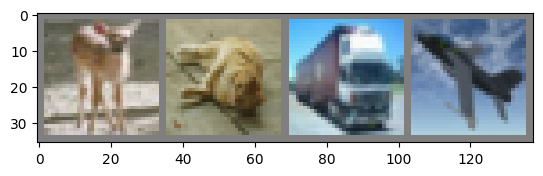

deer       cat        truck      plane     


In [5]:
def imshow(img):
    # Reverse normalization
    img = img / 2 + 0.5
    npimg = img.numpy()

    plt.imshow(numpy.transpose(npimg, (1, 2, 0)))
    plt.show()


# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f"{classes[labels[j]]:10s}" for j in range(BATCH_SIZE)))

### 2. Define a Convolutional Neural Network


In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = torch.flatten(x, 1)  # Flatten all dimensions except batch

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


net = Net()

In [8]:
LEARNING_RATE = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [9]:
net.train(True)

NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):  # Loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.213
[1,  4000] loss: 1.871
[1,  6000] loss: 1.705
[1,  8000] loss: 1.588
[1, 10000] loss: 1.531
[1, 12000] loss: 1.488
[2,  2000] loss: 1.419
[2,  4000] loss: 1.391
[2,  6000] loss: 1.380
[2,  8000] loss: 1.349
[2, 10000] loss: 1.328
[2, 12000] loss: 1.307
[3,  2000] loss: 1.250
[3,  4000] loss: 1.249
[3,  6000] loss: 1.248
[3,  8000] loss: 1.235
[3, 10000] loss: 1.222
[3, 12000] loss: 1.211
Finished Training


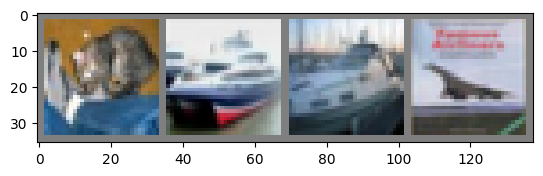

GroundTruth:  cat   ship  ship  plane


In [10]:
net.train(False)

dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join(f"{classes[predicted[j]]:5s}" for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [12]:
correct = 0
total = 0

pred, real = list(), list()

# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Calculate outputs by running images through the network
        outputs = net(images)

        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        real.append(labels)
        pred.append(predicted)

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


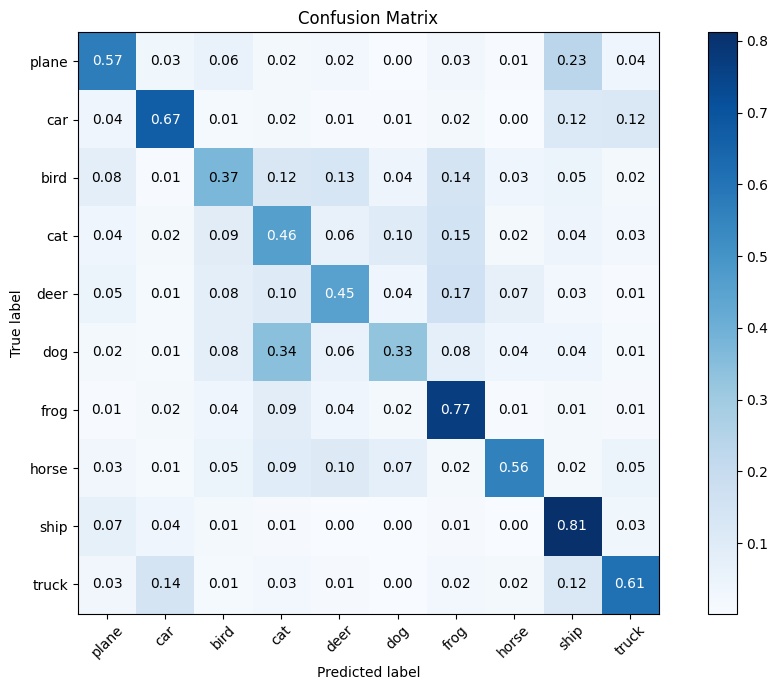

In [13]:
conf_mat = torchmetrics.ConfusionMatrix(
    task="multiclass", num_classes=10, normalize="true"
)
confusion_matrix = conf_mat(torch.cat(pred), torch.cat(real))

df_cm = pd.DataFrame(confusion_matrix.cpu().numpy(), index=classes, columns=classes)

# Plot confusion matrix heatmap using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(df_cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = numpy.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Loop over data dimensions and create text annotations
fmt = '.2f'
thresh = df_cm.values.max() / 2.
for i, j in numpy.ndindex(df_cm.shape):
    plt.text(j, i, format(df_cm.iloc[i, j], fmt),
             ha="center", va="center",
             color="white" if df_cm.iloc[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()